In [2]:
!pip install lightgbm

In [4]:
!pip install xgboost

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Importing nltk libraries
import re
import string
import missingno
import pandas_profiling
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

lemmatizer = nltk.stem.WordNetLemmatizer()

#Imported all the necessary packages.

In [6]:
df = pd.read_csv("Review_Rating_Datafile.csv")
df 

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Don't buy total wastage,It's a geniune rewie...pls don't buy<br>Photos...,2.0 out of 5 stars
1,1,Product fails within a few months.,"It worked well for 4 months, but the hardware ...",2.0 out of 5 stars
2,2,Bad build quality can't suggest anyone,&nbsp;Not suggested to buy b/c<br>1.build qual...,2.0 out of 5 stars
3,3,👎,"Product matirial are bad , and i thinking go f...",2.0 out of 5 stars
4,4,Not so good as some reviews state,The serial number in the carton torn off? No w...,2.0 out of 5 stars
...,...,...,...,...
74518,74518,Highly recommended,Always remember the price point before comment...,5
74519,74519,Super!,Performance is amazing......rest lot of screen...,5
74520,74520,Pretty good,Cons -:\nSmudges like to hang on surface of th...,4
74521,74521,Mind-blowing purchase,"This model comes with a 100% sRGB screen, but ...",5


# Exploratory Data Analysis

In [7]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 74523 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,Don't buy total wastage,It's a geniune rewie...pls don't buy<br>Photos...,2.0 out of 5 stars
1,Product fails within a few months.,"It worked well for 4 months, but the hardware ...",2.0 out of 5 stars
2,Bad build quality can't suggest anyone,&nbsp;Not suggested to buy b/c<br>1.build qual...,2.0 out of 5 stars
3,👎,"Product matirial are bad , and i thinking go f...",2.0 out of 5 stars
4,Not so good as some reviews state,The serial number in the carton torn off? No w...,2.0 out of 5 stars
5,Over heating,"Over heating, and getting abnormal sound with ...",2.0 out of 5 stars
6,Average,Disappointed for below features-<br>Keyboard b...,2.0 out of 5 stars
7,Poor built quality,Didnt expected it to be of such a poor built q...,2.0 out of 5 stars
8,Power button not working properly some times. ...,Sometimes work properly but sometimes doesn't ...,2.0 out of 5 stars
9,Not worth thevprice,Keyboard quality is low and keys not much visible,2.0 out of 5 stars


It looks like our dataframe has 74523 Rows and 3 Columns but we do observe some NaN values that will need to be removed to clean our dataset and make it free from missing values.

In [8]:
df.isna().sum() # checking for missing values

Review_title    13342
Review_text     11559
Ratings         13340
dtype: int64

Using the `isna` and `sum` options together we can confirm that there some missing values in all the 3 columns of our dataset that will need to be treated.

In [10]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 74523 Rows and 3 Columns in our dataframe before removing NaN
We have 60778 Rows and 3 Columns in our dataframe after removing NaN


In [11]:
df.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

Great looks like we were able to successfully remove all the missing data and the new dataframe has 68294 Rows and 3 Columns in it.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60778 entries, 0 to 74522
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  60778 non-null  object
 1   Review_text   60778 non-null  object
 2   Ratings       60778 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


Using the `info` method we are able to confirm the non null count details as well as the datatype information. We have all the 3 columns showing as object datatype here.

In [13]:
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '4', '5', '1', '3',
       '2'], dtype=object)

Looking at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)

In [14]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

So we were able to incorporate the string object datatype values with numeric star values and the target column is clean with integer data in it.

In [15]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Don't buy total wastage,It's a geniune rewie...pls don't buy<br>Photos...,2,Don't buy total wastage It's a geniune rewie.....
1,Product fails within a few months.,"It worked well for 4 months, but the hardware ...",2,Product fails within a few months. It worked w...
2,Bad build quality can't suggest anyone,&nbsp;Not suggested to buy b/c<br>1.build qual...,2,Bad build quality can't suggest anyone &nbsp;N...
3,👎,"Product matirial are bad , and i thinking go f...",2,"👎 Product matirial are bad , and i thinking go..."
4,Not so good as some reviews state,The serial number in the carton torn off? No w...,2,Not so good as some reviews state The serial n...
...,...,...,...,...
74518,Highly recommended,Always remember the price point before comment...,5,Highly recommended Always remember the price p...
74519,Super!,Performance is amazing......rest lot of screen...,5,Super! Performance is amazing......rest lot of...
74520,Pretty good,Cons -:\nSmudges like to hang on surface of th...,4,Pretty good Cons -:\nSmudges like to hang on s...
74521,Mind-blowing purchase,"This model comes with a 100% sRGB screen, but ...",5,Mind-blowing purchase This model comes with a ...


### Visualizing text in first three rows from the newly created "Review" column

In [16]:
df['Review'][0]

"Don't buy total wastage It's a geniune rewie...pls don't buy<br>Photoshop is slow like hell... inbuilt camera is nightmare...notall recommended for people who do video call meetings ..slows down during  trading,slows down during photoshop, don't know about gaming didn't try ...but I'm sure it will give a hell of pain if I play gsmes it's not able to handle photoshop and trading...how is it supposed to handle games ..."

In [17]:
df['Review'][1]

"Product fails within a few months. It worked well for 4 months, but the hardware has started giving problems after that. Get a blue screen every now and then. Also a few marks on the screen that don't go."

In [18]:
df['Review'][2]

"Bad build quality can't suggest anyone &nbsp;Not suggested to buy b/c<br>1.build quality is very bad 😞<br>2. alot heating issue<br>3.performance detoriating with time very early...<br>Mere paise doob gye ... Aap mt dubana😕"

### Text Processing to remove unwanted punctuations and special characters

In [19]:
'''defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text'''

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [20]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Visualizing text in first three rows after applying various text cleaning procedures

In [21]:
df['Review'][0]

'buy total wastage geniune rewiepls buy photoshop slow like hell inbuilt camera nightmarenotall recommended people video call meetings slows tradingslows photoshop know gaming try sure give hell pain play gsmes able handle photoshop tradinghow supposed handle games'

In [22]:
df['Review'][1]

'product fails within months worked well 4 months hardware started giving problems get blue screen every also marks screen go'

In [23]:
df['Review'][2]

'bad build quality suggest anyone nbspnot suggested buy bc 1build quality bad 2 alot heating issue 3performance detoriating time early mere paise doob gye aap mt dubana'

### Lemmatization

In [24]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [25]:
df['Review'][0]

'buy total wastage geniune rewiepls buy photoshop slow like hell inbuilt camera nightmarenotall recommend people video call meeting slow tradingslows photoshop know game try sure give hell pain play gsmes able handle photoshop tradinghow suppose handle game'

In [26]:
df['Review'][1]

'product fails within month work well 4 month hardware start give problem get blue screen every also mark screen go'

In [27]:
df['Review'][2]

'bad build quality suggest anyone nbspnot suggest buy bc 1build quality bad 2 alot heat issue 3performance detoriating time early mere paise doob gye aap mt dubana'

### Text Normalization - Standardization

In [28]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [29]:
df['Review'][0]

'buy total wastage geniune rewiepls buy photoshop slow like hell inbuilt camera nightmarenotall recommend people video call meeting slow tradingslows photoshop know game try sure give hell pain play gsmes able handle photoshop tradinghow suppose handle game'

In [30]:
df['Review'][1]

'product fails within month work well  month hardware start give problem get blue screen every also mark screen go'

In [31]:
df['Review'][2]

'bad build quality suggest anyone nbspnot suggest buy bc build quality bad  alot heat issue performance detoriating time early mere paise doob gye aap mt dubana'

### Word Counts

In [32]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,37,buy total wastage geniune rewiepls buy photosh...
1,20,product fails within month work well month ha...
2,27,bad build quality suggest anyone nbspnot sugge...
3,12,product matirial bad think go intel i processo...
4,17,good review state serial number carton torn wa...
5,6,heat heat get abnormal sound min
6,16,average disappointed feature keyboard backligh...
7,16,poor build quality didnt expect poor build qua...
8,13,power button work properly time face much prob...
9,8,worth thevprice keyboard quality low key much ...


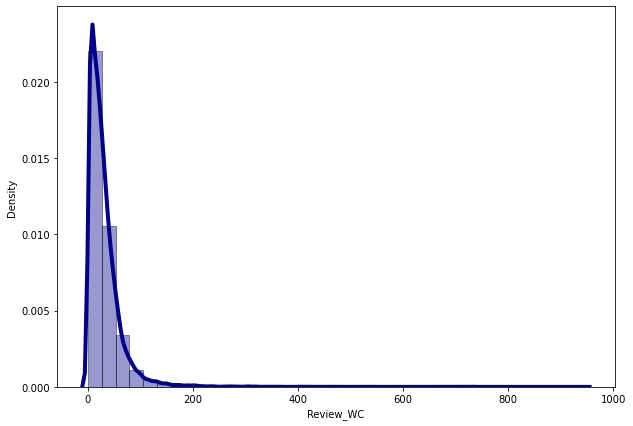

In [33]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.

### Character Counts

In [34]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,256,buy total wastage geniune rewiepls buy photosh...
1,113,product fails within month work well month ha...
2,159,bad build quality suggest anyone nbspnot sugge...
3,70,product matirial bad think go intel i processo...
4,101,good review state serial number carton torn wa...
5,32,heat heat get abnormal sound min
6,120,average disappointed feature keyboard backligh...
7,124,poor build quality didnt expect poor build qua...
8,88,power button work properly time face much prob...
9,53,worth thevprice keyboard quality low key much ...


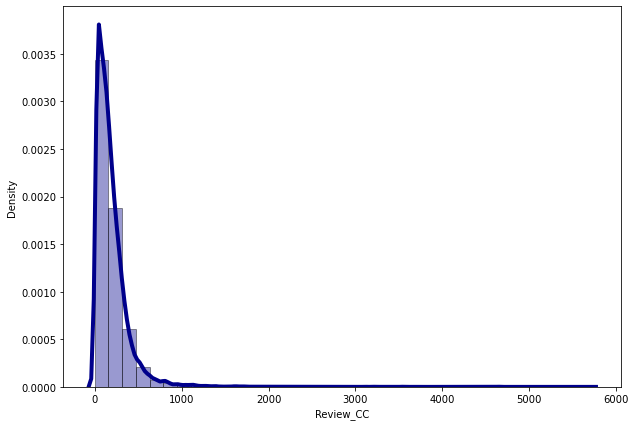

In [35]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

### Removing Outliers

In [36]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 59834 Rows and 6 Columns in our dataframe after removing outliers


As we know that some of the review are too lengthy I am removing those reviews from the data as outliers using Z score method. By removing outliers we are loosing only arround 1000 entries which is acceptable here for getting beter results for our model.

# Visualization

### Plotting histograms for word count and character count again after removing the outliers

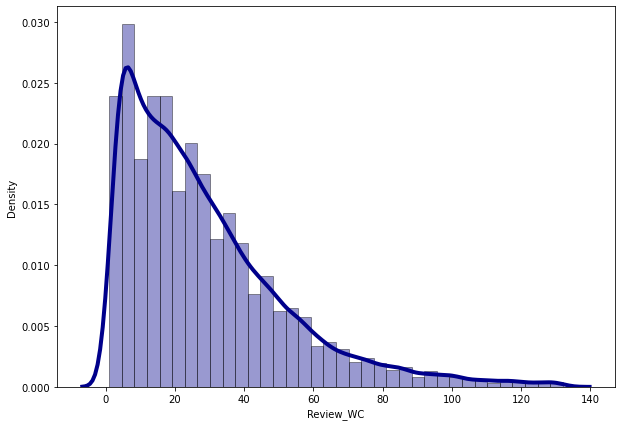

In [38]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that number and density for short word reviews are greater than the one's with lengthy detailed information.

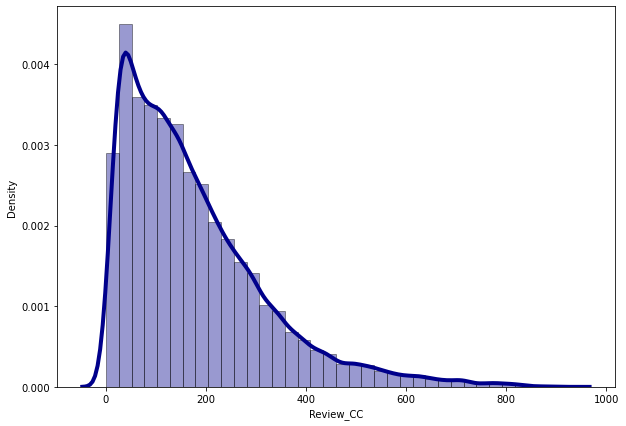

In [39]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that the character details are automatically similar to the word count details and very few people go to the lengths of typing summarized review comments.

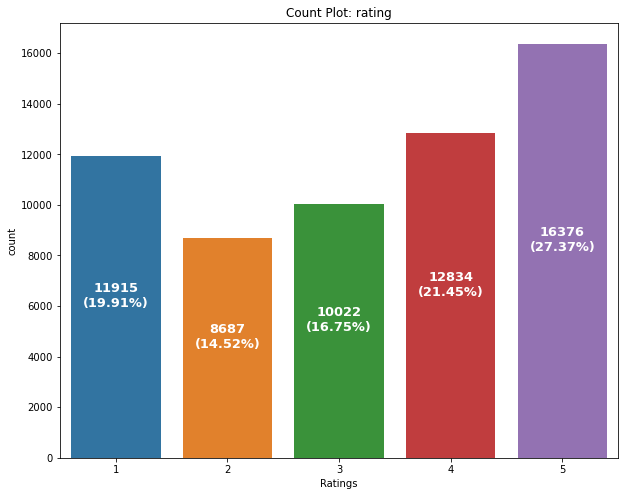

In [40]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

Observation:
- We can see that the highest number of customer rating received are for 5 stars
- Then we have 4 star rating reviews present in our dataset
- However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

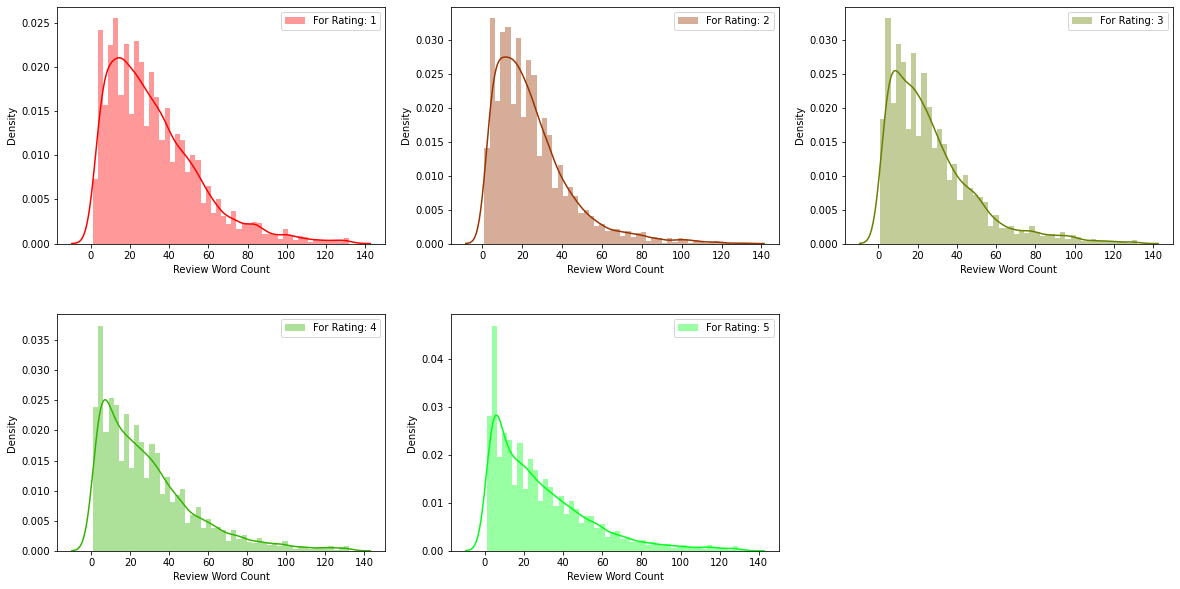

In [41]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

Observation:
The above word count histogram+distributions for each and every rating shows that when people are disappointed with a service they tend to mention a discriptive review as compared to when they are happy they use lesser words to express the joy of having got a great product.

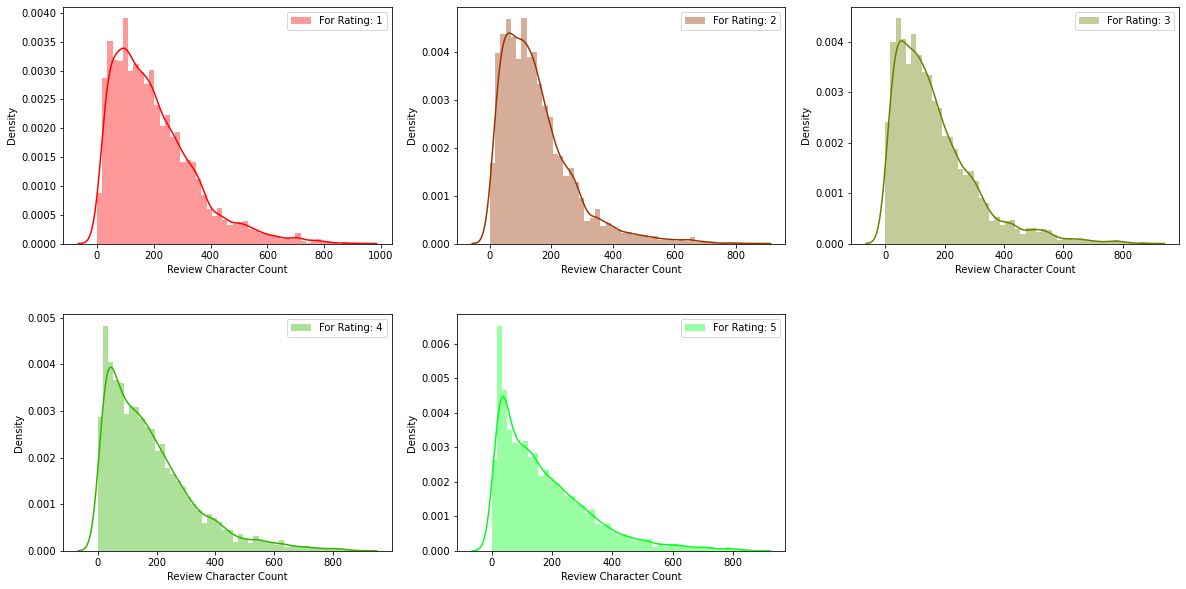

In [42]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

Observation:
Just as in the case of word count histogram+distribution plots the pattern is quite evident that Rating 5 reviews have lesser character counts on their comments when compared to the lower rating details.

### Displaying loud words with Word Cloud information

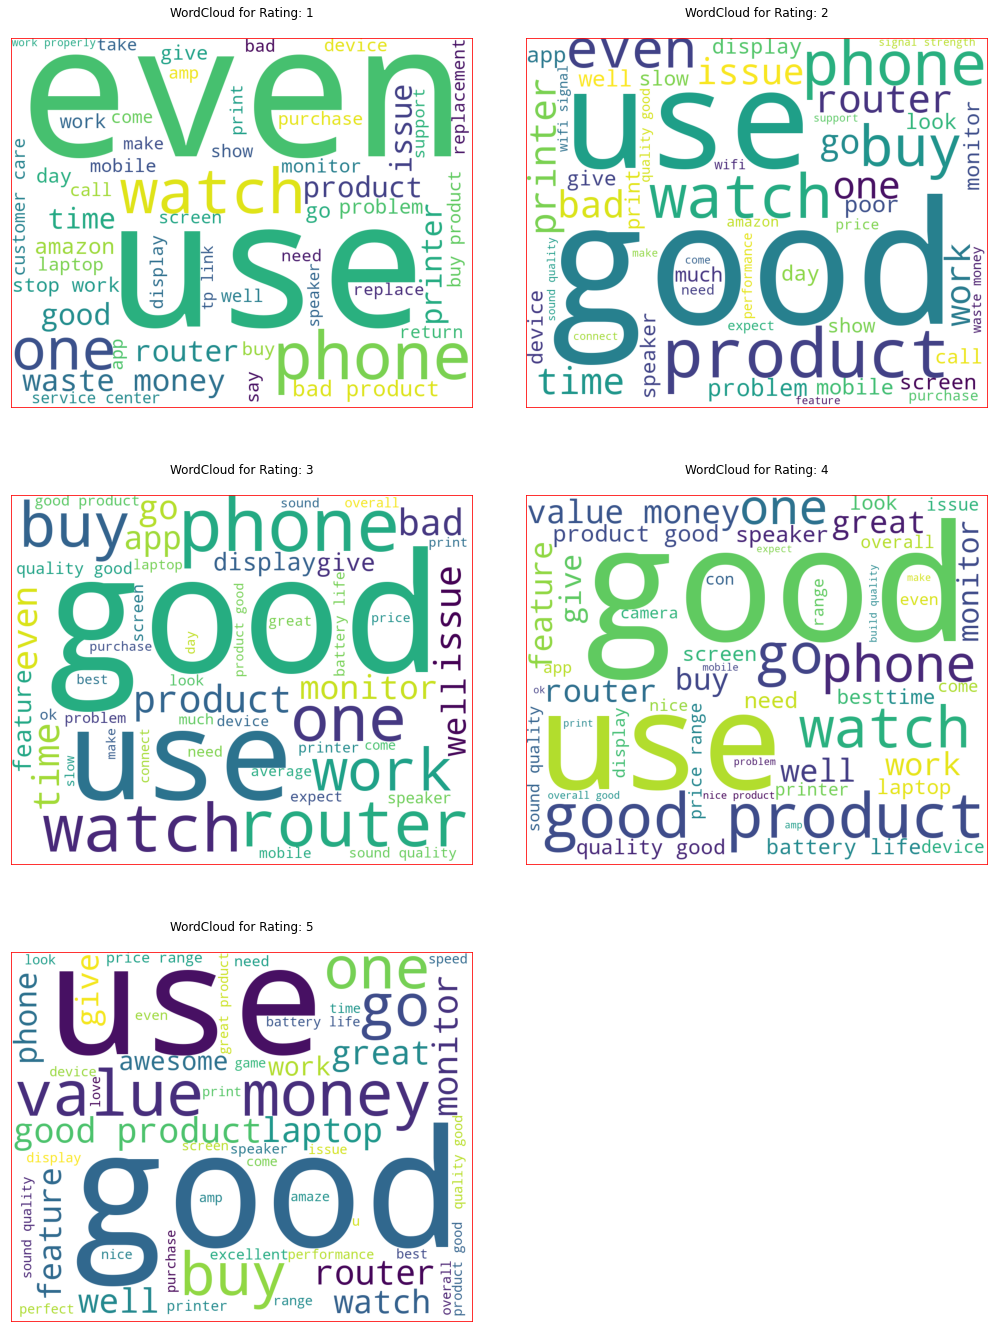

In [43]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(df.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

Observation:

`For Rating: 1`
- It mostly consists of words like even, watch, use, bad product, waste, time, money, bad experience, issue etc

`For Rating: 2`
- It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

`For Rating: 3`
- It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

`For Rating: 4`
- It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

`For Rating: 5`
- It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

5    16376
4    12834
1    11915
3    10022
2     8687
Name: Ratings, dtype: int64


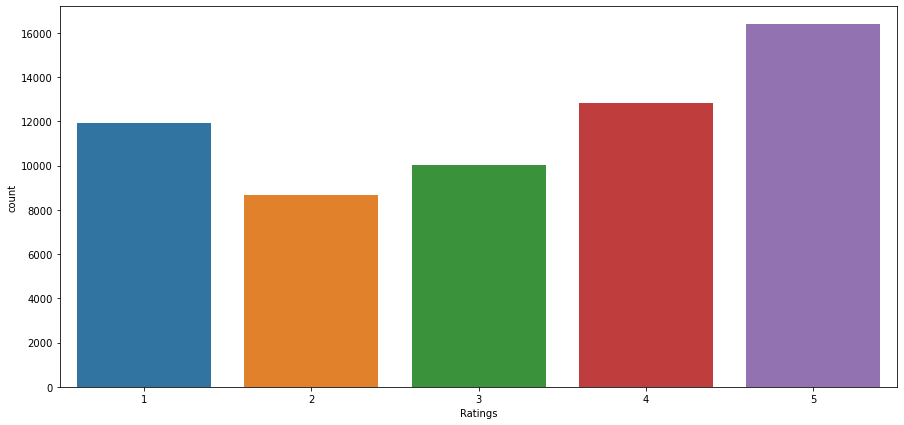

In [44]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Observation:
- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.
- Which will cause the **Imbalance** problem for our Machine Learning model and make it bias.
- So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
- For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart)
- Then I will select equal number of data of every category and ensure that the rating values are balanced

In [45]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Since beginning blue screen is coming,Since beginning blue screen is coming randomly...,1,since begin blue screen come since begin blue ...,30,197
1,Not good value for money paid,Catridge provided with the printer while buyin...,3,good value money pay catridge provide printer ...,20,113
2,"Mic is not working , Disturbance while online ...","Always Online Products are having issues, afte...",1,mic work disturbance online call meeting voice...,37,247
3,Alexa with limited questions answered,1. Alexa have limited access. You can ask only...,3,alexa limited question answer alexa limited a...,35,218
4,"RUBBISH PHONE, WANT MY MONEY BACK","PHONE IS TOTAL RUBBISH. Slowest to respond, C...",1,rubbish phone want money back phone total rubb...,28,186
...,...,...,...,...,...,...
59829,Volume is poor,Over expectations based on the reviews here ma...,3,volume poor expectation base review may lead d...,28,207
59830,Waste of money 😔😟,Bit slow than my previous router. No bandwidth...,1,waste money bit slow previous router bandwidth...,85,488
59831,Not impressed,Lots of connectivity issues,3,impressed lot connectivity issue,4,32
59832,Worst signal for mobile,After seeing so much positive feedback I have ...,1,bad signal mobile see much positive feedback o...,22,157


In [46]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:7356]
df2 = df[df['Ratings']==2][0:7356]
df3 = df[df['Ratings']==3][0:7356]
df4 = df[df['Ratings']==4][0:7356]
df5 = df[df['Ratings']==5][0:7356]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Genuine Feedback :- kindly read below,"So Sony D40 , Right ...<br>This is a genuine f...",4,genuine feedback kindly read sony d right genu...,105,586
1,Very slow print,Very slow,2,slow print slow,3,15
2,No bass,Most of commenters facing sound issues for no ...,4,bass commenters face sound issue bass like nor...,22,133
3,"Samsung Galaxy M32 (6GB + 128 GB Model, Light ...",I have to say this phone is just fantastic. Ca...,4,samsung galaxy m gb gb model light blue say p...,86,514
4,Wast,Worost,1,wast worost,2,11
...,...,...,...,...,...,...
36775,Worst experience ever!,On & Off switch and other function not available,1,bad experience ever switch function available,6,45
36776,Overall printer is average,If you are a heavy duty cycle of printing then...,2,overall printer average heavy duty cycle print...,26,164
36777,Extremely disappointed with the product and th...,Bluetooth keeps disconnecting every half an ho...,2,extremely disappointed product customer suppor...,34,271
36778,Good quality under budget,Good product for budget price range<br>But cam...,4,good quality budget good product budget price ...,15,104


1    7356
2    7356
3    7356
4    7356
5    7356
Name: Ratings, dtype: int64


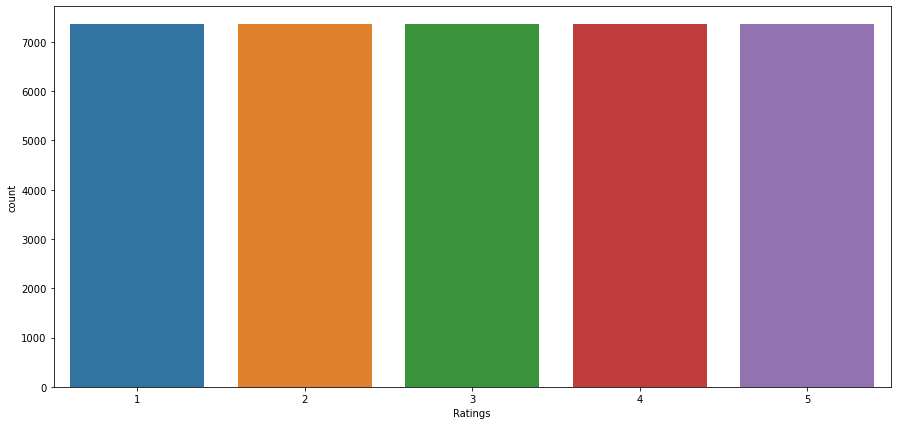

In [47]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Great! we have balanced our data successfully.

### Top 30 most frequently occuring words

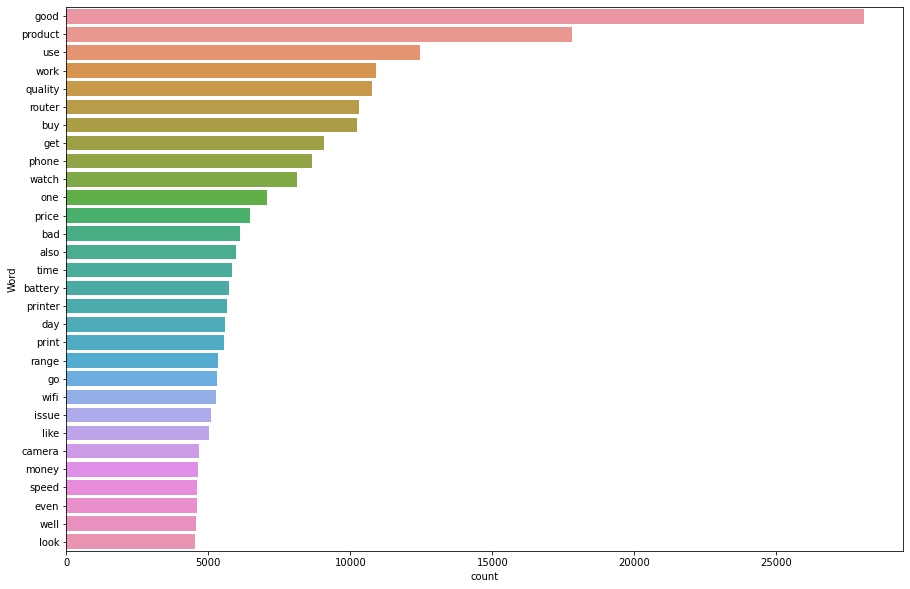

In [48]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])    

### Top 30 rarely occuring words

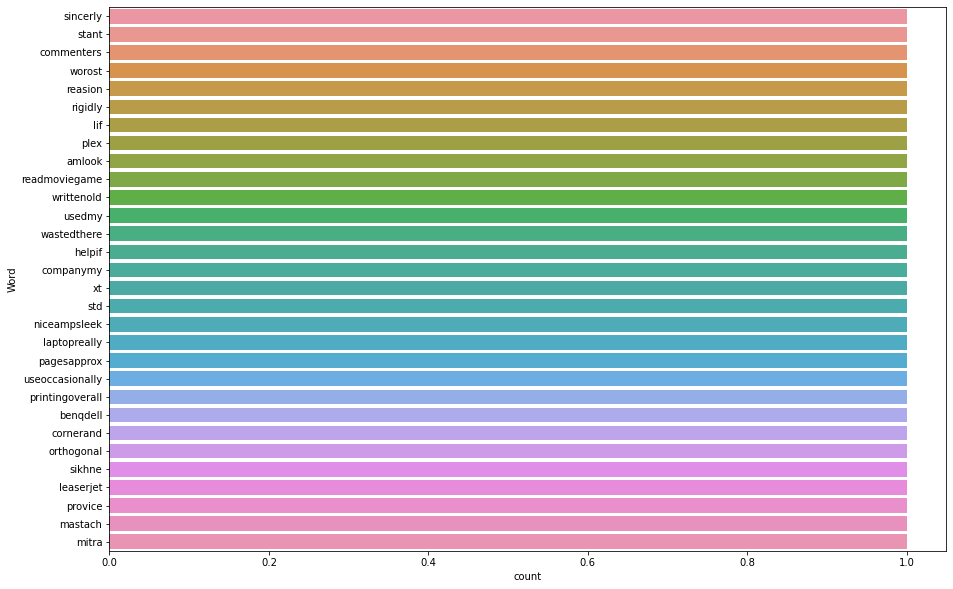

In [49]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])    

# Model Building and Evaluation Metrics

In [50]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

### Converting text into vectors using TfidfVectorizer

In [51]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

### Splitting the data into train and test datasets

In [52]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (25746, 150000)
x_test (11034, 150000)
y_train (25746,)
y_test (11034,)


In [55]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

### Training and testing of all the classification algorithms

In [57]:
for model in [lr,svc,bnb,mnb,sgd,rf,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 63.25901758201922
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.69      0.74      0.71      2197
           2       0.60      0.59      0.59      2222
           3       0.58      0.56      0.57      2203
           4       0.59      0.57      0.58      2269
           5       0.70      0.71      0.70      2143

    accuracy                           0.63     11034
   macro avg       0.63      0.63      0.63     11034
weighted avg       0.63      0.63      0.63     11034

CONFUSION MATRIX: 
 [[1619  356  158   36   28]
 [ 417 1310  333  121   41]
 [ 197  344 1244  298  120]
 [  62  126  322 1283  476]
 [  40   47   96  436 1524]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURAC

# Cross validation score for best score models

In [58]:
# Checking cross-validation score only for those algorithms which are giving us better accuracy.

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf,lgb]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 63.89885807504078


******************************LinearSVC******************************
Cross validation score: 64.26318651441001


******************************SGDClassifier******************************
Cross validation score: 63.5562805872757


******************************RandomForestClassifier******************************
Cross validation score: 65.06797172376292


******************************LGBMClassifier******************************
Cross validation score: 63.088635127786844




In the above cell we cross validated the LogisticRegression, LinearSVC, SGDClassifier, RandomForestClassifier and LGBMClassifier algorithms to ensure we pick the best option that does not have any over fitting or underfitting concerns. I can see that **RandomForestClassifier** has produced the best outcome and we shall use it for further tuning the accuracy percentage.

# HyperParameter Tuning

In [59]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 6.8min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 6.2min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 6.4min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time=13.4min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time=12.0min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time=12.6min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 6.6min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 6.0min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 6.3min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_esti

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [60]:
GSCV.best_params_ # Selecting the best parameters found by GridSearchCV

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 800, 'n_estimators': 200}

In [61]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 65.90538336052202

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.68      0.80      0.74      2197
           2       0.69      0.61      0.64      2222
           3       0.64      0.56      0.60      2203
           4       0.62      0.59      0.61      2269
           5       0.66      0.74      0.70      2143

    accuracy                           0.66     11034
   macro avg       0.66      0.66      0.66     11034
weighted avg       0.66      0.66      0.66     11034


CONFUSION MATRIX: 
 [[1764  235  119   35   44]
 [ 439 1348  243  127   65]
 [ 242  256 1227  309  169]
 [  86   93  220 1350  520]
 [  68   31   96  365 1583]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

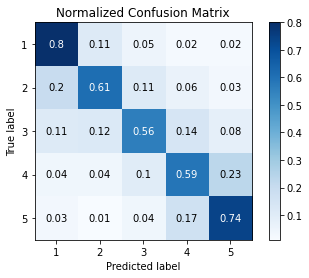

In [62]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

# Saving the best model

In [63]:
joblib.dump(best_model, "Rating_Prediction_Saved_Model.pkl")

['Rating_Prediction_Saved_Model.pkl']

# Loading the final model

In [64]:
Model = joblib.load("Rating_Prediction_Saved_Model.pkl")

In [65]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,2,4
1,5,2
2,3,4
3,5,4
4,4,1
...,...,...
11029,5,3
11030,3,2
11031,3,2
11032,1,4


In [66]:
# Converting the dataframe into CSV format and saving it
results.to_csv('PredictedvsActual_Ratings_Results.csv', index=False)

# Conclusion:

`Key findings of the study:`
In this project I have collected data of reviews and ratings for different products from amazon.in and flipkart.com. Then I have done different text processing for reviews column and chose equal number of text from each rating class to eliminate problem of imbalance. By doing different EDA steps I have analyzed the text. We have checked frequently occurring words in our data as well as rarely occurring words. After all these steps I have built function to train and test different algorithms and using various evaluation metrics I have selected Random Forest Classifier for our final model. Finally by doing hyperparameter tuning we got optimum parameters for our final model. And finally we got improved accuracy score for our final model.


`Final Remarks:`
After applying the hyper parameter tuning the best accuracy score obtained was **65.90%** which can be further improved by obtaining more data and working up through other parameter combinations.